# **1. Chargement des données**

In [ ]:
import pandas as pd
file_path = "ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(file_path)

In [ ]:
# Vérification des valeurs manquantes
df = df.drop_duplicates()
print(f"Nombre de lignes après suppression des doublons : {df.shape[0]}")

Nombre de lignes après suppression des doublons : 2087


# **2. Analyse exploratoire des données**


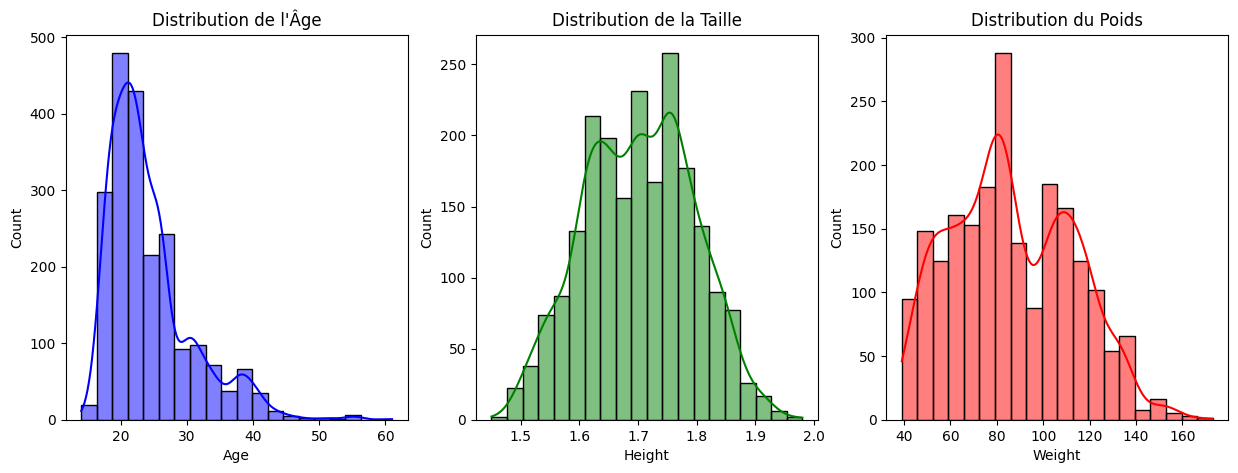

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Distribution de l'Âge
plt.subplot(1, 3, 1)
sns.histplot(df["Age"], bins=20, kde=True, color='blue')
plt.title("Distribution de l'Âge")

# Distribution de la Taille
plt.subplot(1, 3, 2)
sns.histplot(df["Height"], bins=20, kde=True, color='green')
plt.title("Distribution de la Taille")

# Distribution du Poids
plt.subplot(1, 3, 3)
sns.histplot(df["Weight"], bins=20, kde=True, color='red')
plt.title("Distribution du Poids")

plt.show()


# **3.Préparation et nettoyage des données**

In [ ]:
# Encodage des variables catégoriques
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Normalisation des valeurs numériques
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Données préparées avec succès !")

Données préparées avec succès !


# **4.Séparation des données en Train, Validation et Test**

In [ ]:
from sklearn.model_selection import train_test_split

# Séparer les features et la variable cible
X = df.drop(columns=["NObeyesdad"])
y = df["NObeyesdad"]

# Séparation en Train (64%) et Temp (36%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.36, random_state=42, stratify=y)

# Séparation de Temp en Validation (16%) et Test (20%)
# Added y_temp to the function call
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=20/36, random_state=42, stratify=y_temp)

# Vérification des tailles
print(f"Taille Train : {X_train.shape}, Validation : {X_val.shape}, Test : {X_test.shape}")

Taille Train : (1335, 16), Validation : (334, 16), Test : (418, 16)


# **5.Entraînement des modèles**

**5.1 KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy KNN: {acc_knn:.4f}")


Accuracy KNN: 0.7871


In [ ]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

parameters = {'n_neighbors':[2,3,4,5,6,7]}

#Fit the model
model = GridSearchCV(knn, parameters, cv=5)
model.fit(X_train,y_train)

print ( model.best_params_ )
nombre=model.best_params_['n_neighbors']
knn=KNeighborsClassifier(nombre)
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
print('K Plus Proches Voisins avec k optimal (accuracy): '+str(accuracy_score(prediction,y_test)))

{'n_neighbors': 3}
K Plus Proches Voisins avec k optimal (accuracy): 0.7942583732057417


**5.2 DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy Decision Tree: {acc_dt:.4f}")


Accuracy Decision Tree: 0.8900


**5.3 RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Random Forest: {acc_rf:.4f}")


Accuracy Random Forest: 0.9426


**5.4 GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy Gradient Boosting: {acc_gb:.4f}")


Accuracy Gradient Boosting: 0.9522


**5.5 LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy Logistic Regression: {acc_lr:.4f}")


Accuracy Logistic Regression: 0.8828


**5.6 Perceptron**

In [ ]:
from sklearn.linear_model import Perceptron

perc = Perceptron()
perc.fit(X_train, y_train)

y_pred_perc = perc.predict(X_test)
acc_perc = accuracy_score(y_test, y_pred_perc)
print(f"Accuracy Perceptron: {acc_perc:.4f}")


Accuracy Perceptron: 0.4306


**5.7 Support Vector Machine (SVM)**

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Cas 1
paramètres = {'kernel': ['linear'], 'C': list(np.logspace(-3, 3, 5))}
recherche_optimisations=GridSearchCV(SVC(gamma='auto'),paramètres, cv=5)
recherche_optimisations.fit(X_train,y_train)
print ('Cas 1 : \n Meilleurs paramètres : ')
parametre=recherche_optimisations.best_params_
print (parametre)
SVM=SVC(C=parametre["C"],kernel=parametre["kernel"],gamma='auto')
SVM.fit(X_train,y_train)
prediction=SVM.predict(X_test)
print('Machine Vecteurs Supports -Linear Kernel  (accuracy): '+str(accuracy_score(prediction,y_test)))
acc_svm1=accuracy_score(prediction,y_test)
#mesure des performances

# Get the confusion matrix
cm = metrics.confusion_matrix(y_test, prediction)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)

precision = precision_score(y_test, prediction, average='weighted') # Use 'weighted' for multiclass
print('precision :'+str(precision))
recall = recall_score(y_test, prediction, average='weighted') # Use 'weighted' for multiclass
print('recall :'+str(recall))
F1 = f1_score(y_test, prediction, average='weighted') # Use 'weighted' for multiclass
print('F1 :'+str(F1))
#Cas 2
#définition d'une plage de valeurs à tester
Cs = list(np.logspace(-3, 3, 5))
gammas = 10. ** np.arange(1, 2)
degrees = np.r_[1, 2, 3]
paramètres = {'kernel': ['poly'], 'C': Cs, 'gamma': gammas, 'degree': degrees}
recherche_optimisations=GridSearchCV(SVC(),paramètres, cv=5)
recherche_optimisations.fit(X_train,y_train)
print ('\n Cas 2: \n Meilleurs paramètres : ')
parametre=recherche_optimisations.best_params_
print (parametre)
SVM=SVC(C=parametre["C"],kernel=parametre["kernel"],degree=parametre["degree"],gamma=parametre["gamma"])
SVM.fit(X_train,y_train)
prediction=SVM.predict(X_test)
print('Machine Vecteurs Supports -Poly Kernel  (accuracy): '+str(accuracy_score(prediction,y_test)))
acc_svm2=accuracy_score(prediction,y_test)
#mesure des performances

# Get the confusion matrix
cm = metrics.confusion_matrix(y_test, prediction)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)



precision = precision_score(y_test, prediction, average='weighted') # Use 'weighted' for multiclass
print('precision :'+str(precision))
recall = recall_score(y_test, prediction, average='weighted') # Use 'weighted' for multiclass
print('recall :'+str(recall))
F1 = f1_score(y_test, prediction, average='weighted') # Use 'weighted' for multiclass
print('F1 :'+str(F1))

Cas 1 : 
 Meilleurs paramètres : 
{'C': 31.622776601683793, 'kernel': 'linear'}
Machine Vecteurs Supports -Linear Kernel  (accuracy): 0.9521531100478469
Confusion Matrix:
[[52  1  0  0  0  0  0]
 [ 3 51  0  0  0  3  0]
 [ 0  0 68  1  0  0  1]
 [ 0  0  0 59  1  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  0  0  0  0 47  8]
 [ 0  0  0  0  0  1 57]]
precision :0.9541217883944879
recall :0.9521531100478469
F1 :0.9520826700232888

 Cas 2: 
 Meilleurs paramètres : 
{'C': 1.0, 'degree': 1, 'gamma': 10.0, 'kernel': 'poly'}
Machine Vecteurs Supports -Poly Kernel  (accuracy): 0.9593301435406698
0.9593301435406698
Confusion Matrix:
[[53  0  0  0  0  0  0]
 [ 2 51  0  0  0  4  0]
 [ 0  0 68  1  0  0  1]
 [ 0  0  0 59  1  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  0  1  0  0 48  6]
 [ 0  0  0  0  0  0 58]]
precision :0.9607992782952797
recall :0.9593301435406698
F1 :0.9590871735970181


**5.8 XGBoost**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:16:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy XGBoost: 0.9593


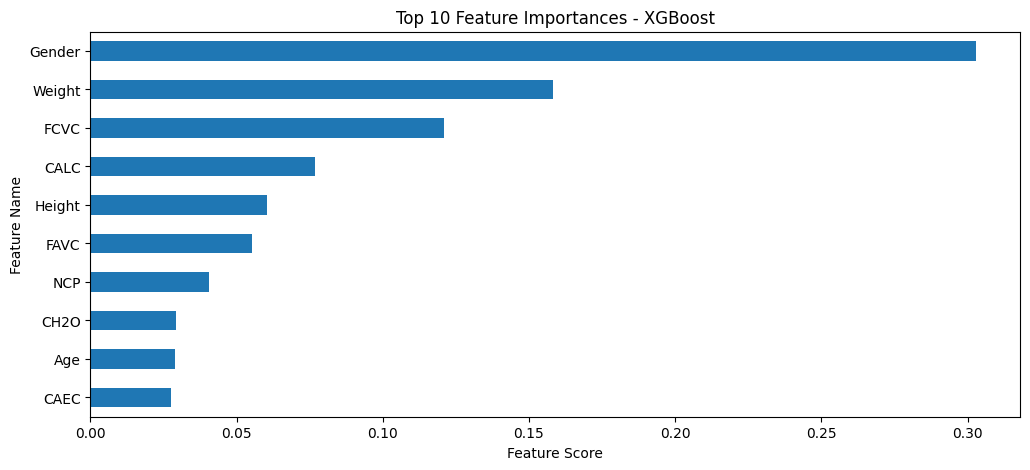

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy XGBoost: {acc_xgb:.4f}")

# Analyse de l'importance des features
feature_importances = xgb.feature_importances_

# Création du DataFrame avec les noms des features et leur importance
df = pd.DataFrame({
    'Feature_name': X_train.columns,
    'Feature_score': feature_importances
})

# Trier par importance décroissante
df.sort_values(by='Feature_score', ascending=False, inplace=True)
df.set_index('Feature_name', inplace=True)

# Visualisation des 10 features les plus importantes
df.iloc[:10].plot(kind='barh', legend=False, figsize=(12, 5))
plt.title("Top 10 Feature Importances - XGBoost")
plt.xlabel("Feature Score")
plt.ylabel("Feature Name")
plt.gca().invert_yaxis()  # Inverser l'axe Y pour que la feature la plus importante soit en haut
plt.show()


# **6.Comparaison des modèles**

<ipython-input-80-510d1140319f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=accuracies, palette="viridis")  # Use accuracies as y values


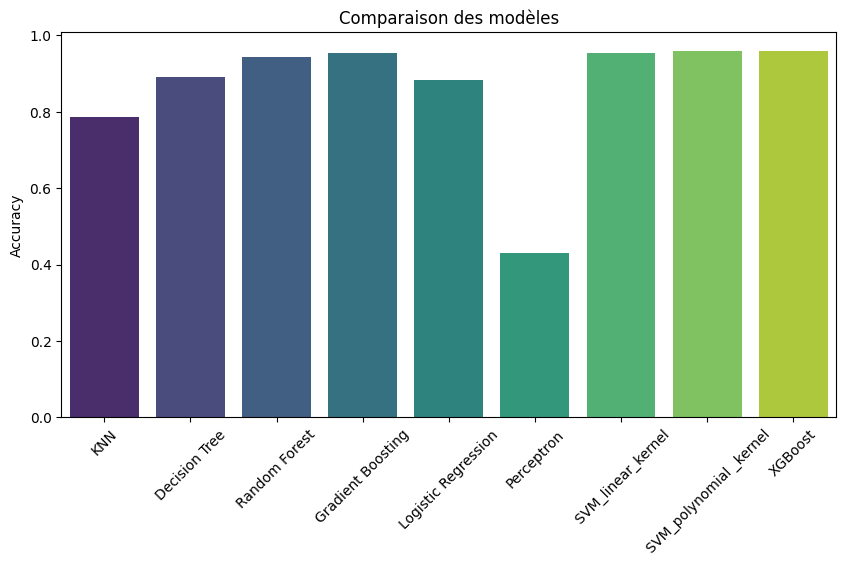

In [ ]:
# Stocker les résultats
results = {
    "KNN": {"Accuracy": acc_knn, "Confusion Matrix": confusion_matrix(y_test, y_pred_knn)},
    "Decision Tree": {"Accuracy": acc_dt, "Confusion Matrix": confusion_matrix(y_test, y_pred_dt)},
    "Random Forest": {"Accuracy": acc_rf, "Confusion Matrix": confusion_matrix(y_test, y_pred_rf)},
    "Gradient Boosting": {"Accuracy": acc_gb, "Confusion Matrix": confusion_matrix(y_test, y_pred_gb)},
    "Logistic Regression": {"Accuracy": acc_lr, "Confusion Matrix": confusion_matrix(y_test, y_pred_lr)},
    "Perceptron": {"Accuracy": acc_perc, "Confusion Matrix": confusion_matrix(y_test, y_pred_perc)},
    " SVM_linear_kernel": {"Accuracy": acc_svm1, "Confusion Matrix": confusion_matrix(y_test, prediction)}, # Assuming 'prediction' is from SVM_linear_kernel
    " SVM_polynomial _kernel": {"Accuracy": acc_svm2, "Confusion Matrix": confusion_matrix(y_test, prediction)}, # Assuming 'prediction' is from SVM_polynomial_kernel
    "XGBoost": {"Accuracy": acc_xgb, "Confusion Matrix": confusion_matrix(y_test, y_pred_xgb)}
}
# Affichage des résultats
plt.figure(figsize=(10, 5))
# Extract accuracy values for the bar plot
accuracies = [result['Accuracy'] for result in results.values()]
sns.barplot(x=list(results.keys()), y=accuracies, palette="viridis")  # Use accuracies as y values
plt.ylabel("Accuracy")
plt.title("Comparaison des modèles")
plt.xticks(rotation=45)
plt.show()

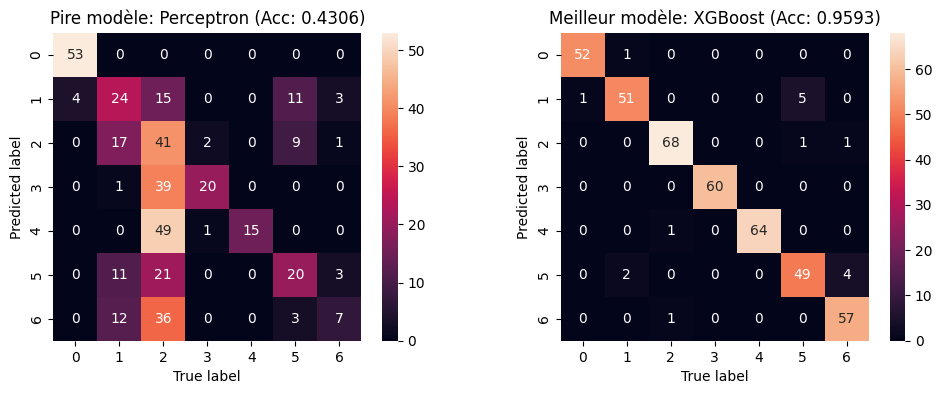

In [ ]:
# Affichage de la matrice de confusion du pire et du meilleur modèle
sorted_results = sorted(results.items(), key=lambda x: x[1]["Accuracy"])
worst_model = sorted_results[0][0]
best_model = sorted_results[-1][0]

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
sns.heatmap(results[worst_model]["Confusion Matrix"], ax=axs[0], square=True, annot=True)
axs[0].set_title(f"Pire modèle: {worst_model} (Acc: {results[worst_model]['Accuracy']:.4f})")
axs[0].set_xlabel("True label")
axs[0].set_ylabel("Predicted label")

sns.heatmap(results[best_model]["Confusion Matrix"], ax=axs[1], square=True, annot=True)
axs[1].set_title(f"Meilleur modèle: {best_model} (Acc: {results[best_model]['Accuracy']:.4f})")
axs[1].set_xlabel("True label")
axs[1].set_ylabel("Predicted label")

plt.show()


In [ ]:
# Liste des classifieurs évalués
classifiers = [('KNeighbors Classifier',KNeighborsClassifier(nombre)),
              ('Decision Tree Classifier',DecisionTreeClassifier(criterion = "entropy",random_state=0)),
               ('Gradient Boosting Classifier',GradientBoostingClassifier()),
           ('Random Forest Classifier',RandomForestClassifier(n_estimators=200)),
               ('Extreme Gradient Boosting',XGBClassifier()) ,
               ('Logistic Regression',LogisticRegression(max_iter=1000)),
               ('Perceptron',Perceptron()),
               ('SVM_linear_kernel',SVC(C=parametre["C"],kernel=parametre["kernel"],gamma='auto')),
               ('SVM_polynomial _kernel',SVC(C=parametre["C"],kernel=parametre["kernel"],degree=parametre["degree"],gamma=parametre["gamma"])),
               ]

In [ ]:
import pandas as pd        # charge un package pour le traitement des données
from sklearn.metrics import confusion_matrix

# Definition des métriques de performance
def perf_compute(clf, name):
    """
    Calcule le temps d'apprentissage, de prediction, le score
    et la matrice de confusion d'un classifieur
    """
    # On initialise le conteneur
    perf = pd.Series(name=name)
    # On crée les callables qu'on passera à la fonction de profiling
    fit = lambda: clf.fit(X_train, y_train)
    score = lambda: clf.score(X_test, y_test)


    # On calcule le score en pourcentage
    perf['score'] = fit().score(X_test, y_test) * 100
    # On calcule la matrice de confusion
    perf['conf_mat'] = [confusion_matrix(fit().predict(X_test), y_test)]

    return perf

In [ ]:
# On lance le calcule de performance
perfs = pd.DataFrame([perf_compute(clf, name) for name, clf in classifiers])
perfs = perfs.sort_values('score')

perfs['score'.split()].T

,Perceptron,KNeighbors Classifier,Logistic Regression,SVM_linear_kernel,Decision Tree Classifier,Random Forest Classifier,Gradient Boosting Classifier,Extreme Gradient Boosting,SVM_polynomial _kernel
score,43.062201,79.425837,88.277512,92.822967,93.301435,94.019139,95.215311,95.933014,95.933014
